# Data Science Jobs market Australia

I've decided to look at the Data scientist, Machine Learning, business Analyst and big data type roles.
1. Determine the industry factors that are most important in predicting the salary amounts for these data.
2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?
You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [2]:
# read in data
jobs = pd.read_csv('/home/dsi-student/Project4/total_jobs.csv')

In [3]:
jobs.head()

,title,company,location,industry,job_type,salary,body1,date
0,Data Scientist / Analytics Specialist,Data#3 Limited -,"Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,NaN,NaN,Are you a talented and skilled IT professional...,13 May 2017
1,Data Scientist - Senior Consultant,Adaps IT -,Location: Melbourne CBD & Inner Suburbs,Information & Communication Technology,NaN,NaN,Role: Data Scientist - Senior Consultant\nExce...,12 May 2017
2,Research Officer / Data Scientist .Work Locati...,Peoplebank Australia ACT -,"Location: Sydney CBD, Inner West & Eastern Sub...",Administration & Office Support,NaN,NaN,Our client is looking a Research Officer / Dat...,12 May 2017
3,Research Officer / Data Scientist,Peoplebank Australia ACT -,Location: ACT,Administration & Office Support,NaN,NaN,Our client is looking a Research Officer / Dat...,12 May 2017
4,2 X Data Scientist,Ambition Technology -,"Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,NaN,Compe,About this role:\nMy client is looking for two...,11 May 2017


In [4]:
# check the ladnscape of the df.

jobs.info()
jobs.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2204 entries, 0 to 2203
Data columns (total 8 columns):
title       2204 non-null object
company     2204 non-null object
location    2203 non-null object
industry    2203 non-null object
job_type    0 non-null float64
salary      724 non-null object
body1       2165 non-null object
date        2203 non-null object
dtypes: float64(1), object(7)
memory usage: 155.0+ KB


(2204, 8)

In [5]:
def checknullcount(df):
    info = []
    columns = ('Feature', 'Nullcount', 'Dtypes')
    for col in df.columns:
        nullcount = df[col].isnull().sum()
        datatype = df[col].dtypes
        info.append([col, nullcount, datatype])
    return (pd.DataFrame(columns=columns, data=info).sort_values('Nullcount', ascending = False))

(checknullcount(jobs))

,Feature,Nullcount,Dtypes
4,job_type,2204,float64
5,salary,1480,object
6,body1,39,object
2,location,1,object
3,industry,1,object
7,date,1,object
0,title,0,object
1,company,0,object


# Temptation
Although the temptation is to go straight for the job type and salary for cleaning, a better approach would be to clean up the title and seperate junior and senior roles as this would in turn will clear up the salary somewhat

In [6]:
# get a feel for the title column
print(jobs['title'].nunique())
jobs['title'].value_counts()
# wow thats alot of "similar" job titles isn't it?
# will have to use this to create a variable to copnvert to dummies

1157


Business Analyst                                                                   263
Senior Business Analyst                                                             97
Data Scientist                                                                      68
Technical Business Analyst                                                          25
Data Scientist - Senior Consultant                                                  24
Business Systems Analyst                                                            20
Agile Business Analyst                                                              17
Digital Business Analyst                                                            17
Data Scientist - Big 4 Consulting                                                   16
Data Scientist - Product Development                                                16
DATA SCIENTIST / MACHINE LEARNING EXPERT                                            15
Business Analysts                          

In [7]:
#create variable
jobs["title_val"] = 't_alt'

In [8]:
# convert to lowercase and get rid of nulls
jobs["title"] = jobs['title'].str.lower()
jobs["title"] = jobs["title"].fillna('NA')

In [9]:
# map job type string in title using (contains) and place "t_" and job in 'titleval' column
jobs.ix[jobs["title"].str.contains('data scientist', na=False),"title_val"] = 't_ds'
jobs.ix[jobs["title"].str.contains('business analyst', na=False),"title_val"] = 't_ba'
jobs.ix[jobs["title"].str.contains('machine learning', na=False),"title_val"] = 't_ml'
jobs.ix[jobs["title"].str.contains('big data', na=False),"title_val"] = 't_bd'

In [10]:
jobs[['title','title_val']].head(10)

,title,title_val
0,data scientist / analytics specialist,t_ds
1,data scientist - senior consultant,t_ds
2,research officer / data scientist .work locati...,t_ds
3,research officer / data scientist,t_ds
4,2 x data scientist,t_ds
5,actuary/data scientist – risk mitigation,t_ds
6,data scientist - product development,t_ds
7,data scientist - senior consultant,t_ds
8,data scientist / machine learning expert,t_ml
9,data scientist and lead data scientist,t_ds


In [11]:
# Create dummies

title_dummies = pd.get_dummies(jobs['title_val'])

In [12]:
# concatenate with main df

jobs = pd.concat([jobs, title_dummies], axis=1)


In [13]:
# Drop MiscFeature column and one of the MiscFeature categories ('other'):

jobs = jobs.drop('t_alt', 1)
jobs.head(2)

,title,company,location,industry,job_type,salary,body1,date,title_val,t_ba,t_bd,t_ds,t_ml
0,data scientist / analytics specialist,Data#3 Limited -,"Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,NaN,NaN,Are you a talented and skilled IT professional...,13 May 2017,t_ds,0,0,1,0
1,data scientist - senior consultant,Adaps IT -,Location: Melbourne CBD & Inner Suburbs,Information & Communication Technology,NaN,NaN,Role: Data Scientist - Senior Consultant\nExce...,12 May 2017,t_ds,0,0,1,0


In [14]:
# Create variable with default value of 'ranking':
jobs["ranking"] = 'r_alt'

jobs["title"] = jobs['title'].str.lower()
''
# map job type string in title using (contains) and place "3_" and job in 'titleval' column
jobs.ix[jobs["title"].str.contains('junior'),"ranking"] = 'r_junior'
jobs.ix[jobs["title"].str.contains('senior'),"ranking"] = 'r_senior'
jobs.ix[jobs["title"].str.contains('manager'),"ranking"] = 'r_manager'
jobs.ix[jobs["title"].str.contains('specialist'),"ranking"] = 'r_specialist'

In [15]:
 # Create dummies for job ranking

ranking_dummies = pd.get_dummies(jobs['ranking'])

# concat dummies into df

jobs = pd.concat([jobs, ranking_dummies], axis=1)

In [16]:
jobs = jobs.drop('r_alt', 1)
jobs.head(2)

,title,company,location,industry,job_type,salary,body1,date,title_val,t_ba,t_bd,t_ds,t_ml,ranking,r_junior,r_manager,r_senior,r_specialist
0,data scientist / analytics specialist,Data#3 Limited -,"Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,NaN,NaN,Are you a talented and skilled IT professional...,13 May 2017,t_ds,0,0,1,0,r_specialist,0,0,0,1
1,data scientist - senior consultant,Adaps IT -,Location: Melbourne CBD & Inner Suburbs,Information & Communication Technology,NaN,NaN,Role: Data Scientist - Senior Consultant\nExce...,12 May 2017,t_ds,0,0,1,0,r_senior,0,0,1,0


# Preparing the Salary column
Cleaning the salary column and converting it to numeric. 
Obvious assupmtions are as follows:  
1. All salaries to be per annum - otherwise to annualised
2. 'k' or 'K' is $000's
Limitations of this study are as follows:
1. 'other' negotiable peripherals in the the salary package
2. the final salary.

In [17]:
jobs.salary.unique()

array([nan, 'Compe', '$800 - 1100 per day', 'Competitive and negotiable',
       '$700 - 900 per day', 'Start up culture', '$100,000 - $130,000',
       'Up to $120,000 plus super', '$140,000 - $180,000 + Bonus',
       '$140-150K base salary', 'up to $145,000 inc Super',
       '$100,000 - $149,999', '$120,000 to $130,000', '$90,000 - $119,999',
       '$93 934 - $100 624 p.a.', '$550 - $600 a day + super',
       '$700 p.d. + GST', '$$$ Negotiable and attractive daily rate',
       'Great hourly rate on offer', '$750-780+Super', 'competitive',
       'superannuation', '$4,035.80 to $4,331.20 per fortnight.',
       'To $150K', '$640 per day + Super', '$70k - $80k p.a. + Super',
       '600-750', '$80 - $84.99 per hour', '$100 - $100+ per hour',
       '$100k - $140k p.a. + Super', '$600-750 daily',
       '$700 - $800 per day super inclusive', '$120K - $130K p.a. + super',
       'Competitive Salary + On-Site Gym', '$100000.00 - $120000.00 p.a.',
       'Up to $55ph + S', '$748.90 in

In [18]:
# sorry I asked.... lets just try some commmon threads, will have to do my best to commopnalise - is that a word?  anyway 
# you know what I mean.
jobs["salary"] = jobs["salary"].str.replace("$", "")
jobs["salary"] = jobs["salary"].str.replace("/", "")
jobs["salary"] = jobs["salary"].str.replace("+", "")
jobs["salary"] = jobs["salary"].str.replace("k", "000")
jobs["salary"] = jobs["salary"].str.replace("K", "000")
jobs["salary"] = jobs["salary"].str.replace("p.a", "year")
jobs["salary"] = jobs["salary"].str.replace("p.d", "day")
jobs["salary"] = jobs["salary"].str.replace("p.h", "hour")
jobs["salary"] = jobs["salary"].str.replace("p.m", "month")
jobs["salary"] = jobs["salary"].str.replace("\n", "")
jobs["salary"] = jobs["salary"].str.replace(",", "")
jobs["salary"] = jobs["salary"].str.replace("to", "-")

In [19]:
jobs["salary"].head()

# now to check the time and convert, to do this i will Create empty sal_annual column

jobs["sal_annual"] = np.nan

In [20]:
# If the salary contains information on time period, save that time period string in the 'salary_period' column.
# Idea of creating a payment freuqency column sourced from Michael Salmon on medium.com blog

jobs["salary"] = jobs["salary"].fillna('NA')
jobs.ix[jobs["salary"].str.contains("year"),"sal_annual"] = "year"
jobs.ix[jobs["salary"].str.contains("month"),"sal_annual"] = "month"
jobs.ix[jobs["salary"].str.contains("week"),"sal_annual"] = "week"
jobs.ix[jobs["salary"].str.contains("day"),"sal_annual"] = "day"
jobs.ix[jobs["salary"].str.contains("hour"),"sal_annual"] = "hour"
jobs.head(2)


,title,company,location,industry,job_type,salary,body1,date,title_val,t_ba,t_bd,t_ds,t_ml,ranking,r_junior,r_manager,r_senior,r_specialist,sal_annual
0,data scientist / analytics specialist,Data#3 Limited -,"Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,NaN,NA,Are you a talented and skilled IT professional...,13 May 2017,t_ds,0,0,1,0,r_specialist,0,0,0,1,NaN
1,data scientist - senior consultant,Adaps IT -,Location: Melbourne CBD & Inner Suburbs,Information & Communication Technology,NaN,NA,Role: Data Scientist - Senior Consultant\nExce...,12 May 2017,t_ds,0,0,1,0,r_senior,0,0,1,0,NaN


In [21]:
# Find all numeric features for each row in the salary column and place in a list
jobs["sal_range"] = [re.findall('\d+', s) for s in jobs["salary"]]
jobs["sal_range"][0:6]


0    []
1    []
2    []
3    []
4    []
5    []
Name: sal_range, dtype: object

In [22]:
# Take the max
sal_max = []
for salary in jobs["sal_range"]:
    if len(salary) > 0:
        sal_max.append(float(max(salary)))
    else:
        sal_max.append(1) # this to ensure annualisation condcutde for all rows
        
print (len(sal_max))

2204


In [23]:
# Create series

sal_max_df = pd.Series(sal_max,name='sal_max')

print (sal_max_df.head())

0    1
1    1
2    1
3    1
4    1
Name: sal_max, dtype: float64


In [24]:
# join with initial df

jobs = jobs.join(sal_max_df)
                  
jobs.head(2)

,title,company,location,industry,job_type,salary,body1,date,title_val,t_ba,...,t_ds,t_ml,ranking,r_junior,r_manager,r_senior,r_specialist,sal_annual,sal_range,sal_max
0,data scientist / analytics specialist,Data#3 Limited -,"Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,NaN,NA,Are you a talented and skilled IT professional...,13 May 2017,t_ds,0,...,1,0,r_specialist,0,0,0,1,NaN,[],1
1,data scientist - senior consultant,Adaps IT -,Location: Melbourne CBD & Inner Suburbs,Information & Communication Technology,NaN,NA,Role: Data Scientist - Senior Consultant\nExce...,12 May 2017,t_ds,0,...,1,0,r_senior,0,0,1,0,NaN,[],1


In [25]:
# phew... this is getting serious.
# Firstly, we create a multiplier column based on the salary period

jobs["sal_annual"] = jobs["sal_annual"].fillna('1.0')
jobs.ix[jobs["sal_annual"].str.contains("year"),"sal_multiplier"] = 1.0
jobs.ix[jobs["sal_annual"].str.contains("month"),"sal_multiplier"] = 12.0 
jobs.ix[jobs["sal_annual"].str.contains("week"),"sal_multiplier"] = 48.0 # general working weeks
jobs.ix[jobs["sal_annual"].str.contains("day"),"sal_multiplier"] = 249.0 # avg of 249 working days PA
jobs.ix[jobs["sal_annual"].str.contains("hour"),"sal_multiplier"] = 1976.0 # Avg. of 1976 working days PA.

In [26]:
# Calculate final wage: maximum sal multiplied by the period

jobs['sal_max'] = jobs["sal_max"].fillna('1')
jobs['sal_final'] = jobs['sal_max'] * jobs['sal_multiplier']
jobs.head(2)

,title,company,location,industry,job_type,salary,body1,date,title_val,t_ba,...,ranking,r_junior,r_manager,r_senior,r_specialist,sal_annual,sal_range,sal_max,sal_multiplier,sal_final
0,data scientist / analytics specialist,Data#3 Limited -,"Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,NaN,NA,Are you a talented and skilled IT professional...,13 May 2017,t_ds,0,...,r_specialist,0,0,0,1,1.0,[],1,NaN,NaN
1,data scientist - senior consultant,Adaps IT -,Location: Melbourne CBD & Inner Suburbs,Information & Communication Technology,NaN,NA,Role: Data Scientist - Senior Consultant\nExce...,12 May 2017,t_ds,0,...,r_senior,0,0,1,0,1.0,[],1,NaN,NaN


In [27]:
# get a feel for the industry column
jobs['industry'].value_counts()

Information & Communication Technology    1524
Accounting                                 173
Consulting & Strategy                      125
Banking & Financial Services               120
Science & Technology                        60
Government & Defence                        42
Administration & Office Support             31
Marketing & Communications                  30
Manufacturing, Transport & Logistics        15
Sales                                       14
Insurance & Superannuation                  12
Human Resources & Recruitment               11
Education & Training                        11
Healthcare & Medical                         6
Real Estate & Property                       5
Mining, Resources & Energy                   4
Retail & Consumer Products                   4
Call Centre & Customer Service               4
Design & Architecture                        3
Engineering                                  2
Legal                                        2
Community Ser

In [28]:
 # Create dictionary for industry - '1_' indicates an industry.
# This will be a useful identifier when creating dummy columns.

ind_dict = {'Information & Communication Technology':'1_ICT'
                 ,'Accounting':'1_accounting'
                 ,'Banking & Financial Services':'1_BFS'
                 ,'Consulting & Strategy':'1_ConsStrat'
                 ,'Advertising, Arts & Media':'1_media'
                 ,'Design & Architecture':'1_architecture'
                 ,'Community Services & Development':'1_csd'
                 ,'Legal':'1_legal'
                 ,'Farming, Animals & Conservation':'1_farming'
                 ,'Construction':'1_construct'
                 ,'Science & Technology':'1_SciTech'
                 ,'Marketing & Communications':'1_MarkComms'
                 ,'Government & Defence':'1_Gov'
                 ,'Insurance & Superannuation':'1_InsurSuper'
                 ,'Education & Training':'1_Education'
                 ,'Sales':'1_Sales'
                 ,'Healthcare & Medical':'1_health'
                 ,'Manufacturing, Transport & Logistics':'1_manufacturing'
                 ,'Administration & Office Support':'1_admin'
                 ,'Human Resources & Recruitment':'1_HR'
                 ,'Engineering':'1_engineering','Mining, Resources & Energy':'1_miningEnergy'
                 ,'Real Estate & Property':'1_property'
                 ,'Call Centre & Customer Service':'1_customerS'
                 ,'Retail & Consumer Products':'1_retail'                 
                 ,'CEO & General Management':'1_management'}


In [29]:
# Create field with dictionary

jobs['ind_val'] = jobs['industry'].map(ind_dict)

# Place 'other' for no industry records

jobs['ind_val'] =jobs['ind_val'].fillna('1_alt')

jobs.head(2)

,title,company,location,industry,job_type,salary,body1,date,title_val,t_ba,...,r_junior,r_manager,r_senior,r_specialist,sal_annual,sal_range,sal_max,sal_multiplier,sal_final,ind_val
0,data scientist / analytics specialist,Data#3 Limited -,"Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,NaN,NA,Are you a talented and skilled IT professional...,13 May 2017,t_ds,0,...,0,0,0,1,1.0,[],1,NaN,NaN,1_ICT
1,data scientist - senior consultant,Adaps IT -,Location: Melbourne CBD & Inner Suburbs,Information & Communication Technology,NaN,NA,Role: Data Scientist - Senior Consultant\nExce...,12 May 2017,t_ds,0,...,0,0,1,0,1.0,[],1,NaN,NaN,1_ICT


In [66]:
# Create dummies

ind_val_dummies = pd.get_dummies(jobs['ind_val'])

# Concat jobs_final

jobs = pd.concat([jobs, ind_val_dummies], axis=1)

jobs.head(2)

,title,company,location,industry,job_type,salary,body1,date,title_val,t_ba,...,1_customerS,1_engineering,1_health,1_legal,1_management,1_manufacturing,1_media,1_miningEnergy,1_property,1_retail
0,data scientist / analytics specialist,Data#3 Limited -,"Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,NaN,NA,Are you a talented and skilled IT professional...,13 May 2017,t_ds,0,...,0,0,0,0,0,0,0,0,0,0
1,data scientist - senior consultant,Adaps IT -,Location: Melbourne CBD & Inner Suburbs,Information & Communication Technology,NaN,NA,Role: Data Scientist - Senior Consultant\nExce...,12 May 2017,t_ds,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# now to extract the key words from the job description, in order to do this
# I will have to tidy up the text and remove unnecssary words symbols etc.
# I'm looking to keep keywords. lets see how we go.
# ref: http://stackoverflow.com/questions/5486337/how-to-remove-stop-words-using-nltk-or-python
# ref: http://stackoverflow.com/questions/5541745/get-rid-of-stopwords-and-punctuation

from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn

def tidy_text(body):

    # Remove unwanted items
    link_remove = re.sub(r"http\S+", "", str(body))
    
    letters = re.sub("[^a-zA-Z]", " ", link_remove) 
    
    # Convert to lower case, split into individual words
    words = letters.lower().split()                             
    
    # Convert the stop words to a set (increases search speed)
    stops = set(stopwords.words("english"))                  
    
    # Remove stop words
    filtered_words = [w for w in words if not w in stops]   
    #
    # Join the words back into one string separated by space and return the result.
    return (" ".join(filtered_words))

In [68]:
# Create a new list from parsing

tidied_text = []

for row in jobs['body1']:
    tidied_text.append(tidy_text(row))

tidied_text[0]

'talented skilled professional looking next challenge data currently looking experienced data scientist analytics specialist work client initial month contract view extend convert perm client world class educational institution strong focus research analytics believe pursuing excellence analytics requires latest innovative technology across disciplines heavily invested advancement analytics team opportunity role reports director institutional analytics provides expertise inspires adoption advanced analytics solutions platforms insights organisation develops innovative solutions business problems keeping abreast emerging technologies looking looking person extensive experience capability across data analysis data quality management reporting also following qualities technical skills expert level understanding modern data software tools cloud computing many existing commercial products used data analytics extensive experience modern data centric programing languages including one python 

In [69]:
# add cleaned text to dataframe

jobs['body_clean'] = tidied_text
jobs.head(2)

,title,company,location,industry,job_type,salary,body1,date,title_val,t_ba,...,1_customerS,1_engineering,1_health,1_legal,1_management,1_manufacturing,1_media,1_miningEnergy,1_property,1_retail
0,data scientist / analytics specialist,Data#3 Limited -,"Location: Sydney CBD, Inner West & Eastern Sub...",Information & Communication Technology,NaN,NA,Are you a talented and skilled IT professional...,13 May 2017,t_ds,0,...,0,0,0,0,0,0,0,0,0,0
1,data scientist - senior consultant,Adaps IT -,Location: Melbourne CBD & Inner Suburbs,Information & Communication Technology,NaN,NA,Role: Data Scientist - Senior Consultant\nExce...,12 May 2017,t_ds,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Vectorise df of words from the tidy jd
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# ref: http://adataanalyst.com/scikit-learn/countvectorizer-sklearn-example/

from sklearn.feature_extraction.text import CountVectorizer

print ("Creating words...\n")

# Initialize the "CountVectorizer" - only top 15000 words kept
vectorizer = CountVectorizer(analyzer = "word",tokenizer = None,preprocessor = None,stop_words = None,max_features = 15000) 

# fit_transform() with our cleaned body text
train_data_features = vectorizer.fit_transform(tidied_text)

# Fit cvec and convert the result to a DataFrame
skills_df = pd.DataFrame(vectorizer.transform(tidied_text).todense(), columns=vectorizer.get_feature_names())

print (skills_df.shape)

Creating words...

(2204, 13211)


In [71]:
# fill nulls
skills_df.fillna(0)

skills_df.head()

,aa,aanlyst,aarconsultinggroup,ab,abap,abapdata,abappscd,abbotsford,abby,abc,...,zepplin,zero,zest,zetaris,zinfra,zone,zoo,zookeeper,zsoftech,zsofttech
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Create a list of data job skills sourced from multiple sources (and my own opinion!)

skills = ['administration', 'management','research',
        'data mining', 'modeling', 'predictive','business intelligence', 'optimization', 'mining','science'
        'cloud', 'statistics',
        'analysis', 'nlp',
        'simulation', 'simulations', 'tableau', 'd3.js', 'sas','html','d3',
        'hadoop', 'mapreduce','spark', 'pig', 'hive', 'shark','stats',
        'zookeeper', 'flume', 'sql', 'nosql',
        'mongodb', 'aws', 'unstructured', 'structured',
        'structured', 'curiosity','communication','munging',
        'learning', 'calculus', 'algebra', 'statistics', 'visualization',
        'engineering', 'maths', 'design','classification', 'clustering','regression',
        'entrepreneurial', 'entrepreneur', 'team','systems','IT',
        'wrangling','mungoDB','r','rstudio','c++', 'python', 'java', 'ruby', 'javascript', 'data',
        'matlab', 'scala', 'excel', 
        'development', 'deep learning', 'network', 'neural', 'sci-kit',
        'pandas', 'numpy', 'bi', 'knime', 'octave', 'xlstat', '@risk',
        'probability', 'dato', 'ggplot', 'ggvis', 'word', 'powerpoint', 'studio','management','analyst',
        'presentation','writing']

In [73]:
# Filter the columns of the vectorised dataframe for those that exist in our data skills list

skill_list = skills_df.columns

filter_list = [x for x in skill_list if x in skills]
filter_list[0:5]

['administration', 'analysis', 'analyst', 'aws', 'bi']

In [74]:
# Note this list is used to manually filter the full vectoriser dataframe
# This allow a series of key-skills dummy columns to be placed into the final dataframe in the next cell.

# Create a final data job skills dataframe and concatenate with the original dataframe

skills_df = words_df[['python', 'java', 'ruby', 'javascript', 'data',
        'matlab', 'scala', 'excel', 'tableau', 'sas','html',
        'hadoop', 'mapreduce','spark', 'pig', 'hive', 'stats',
        'zookeeper', 'flume', 'sql', 'nosql',
        'mongodb', 'aws', 'unstructured',
        'structured', 'curiosity','communication',
        'learning', 'visualization',
        'engineering', 'maths', 'design',
        'development', 'administration', 'management','research',
        'modeling', 'predictive',
        'intelligence', 'optimization', 'mining','science',
        'cloud', 'statistics',
        'analysis', 'nlp',
        'simulation', 'simulations', 'classification', 'clustering','regression',
        'entrepreneurial', 'entrepreneur', 'team','systems',
        'wrangling',
        'deep', 'network', 'neural',
        'pandas', 'numpy', 'bi',
        'word', 'powerpoint', 'studio','ms',
        'presentation','writing',
        'bachelors','bachelor','masters','phd']]

print (skills_df.shape)

(2204, 72)


In [140]:
# Concatenate into the final dataframe 'job_data_final'

jobs_final = pd.concat([jobs, skills_df], axis=1)
jobs_final.shape

(2204, 123)

In [141]:
jobs_final.isnull().sum().sort_values(ascending=False).head(10)

# Remove column nulls

job_type          2204
sal_multiplier    1934
sal_final         1934
body1               39
location             1
industry             1
date                 1
phd                  0
1_csd                0
1_health             0
dtype: int64

In [142]:
# Calculate mean and std
mean = np.mean(jobs_final['sal_final'], axis=0)
sd = np.std(jobs_final['sal_final'], axis=0)

In [143]:
final_list = [x for x in jobs_final.sal_final if (x < mean + 1.5 * sd)]

# Filter hail data by friends counts to keep:
jobs_final = jobs_final.ix[(jobs_final['sal_final'].isin(final_list))]

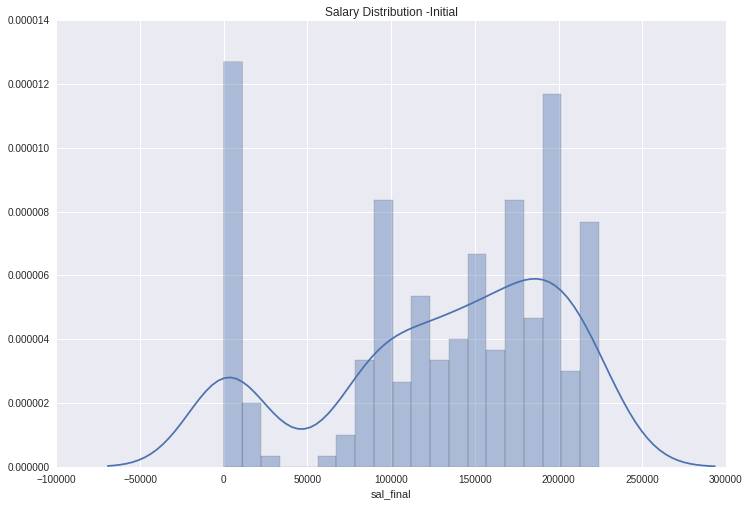

In [144]:
# safe to say that it obvious that annual salaries below $40k is somehow not realistic in AU.

fig = plt.figure(figsize=(12, 8))
sns.distplot(jobs_final['sal_final'],bins=20)
plt.title("Salary Distribution -Initial")
plt.show()

In [146]:
# Check length of new dataframe and new max friends count
print (len(jobs_final))
print (jobs_final['sal_final'].max())

267
224100.0


In [147]:
jobs_final = jobs_final[jobs_final['sal_final'] > 40000]

print (jobs_final.shape)

(222, 123)


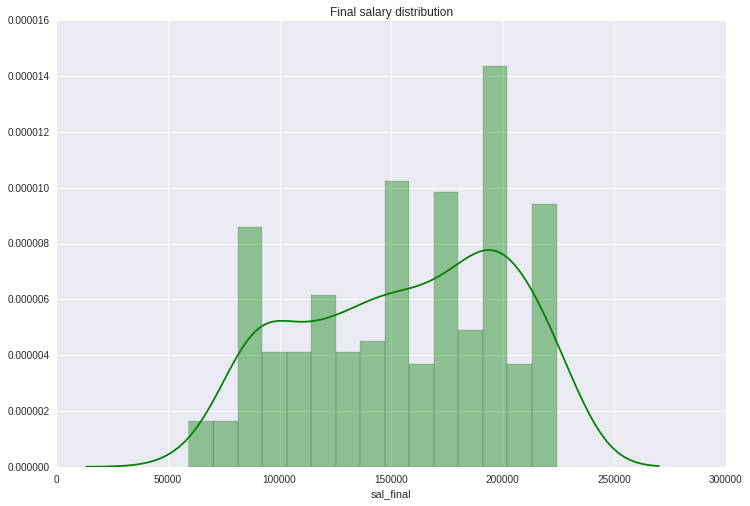

In [148]:
fig = plt.figure(figsize=(12, 8))
sns.distplot(jobs_final['sal_final'], bins=15,color='g')
plt.title("Final salary distribution")
plt.show()

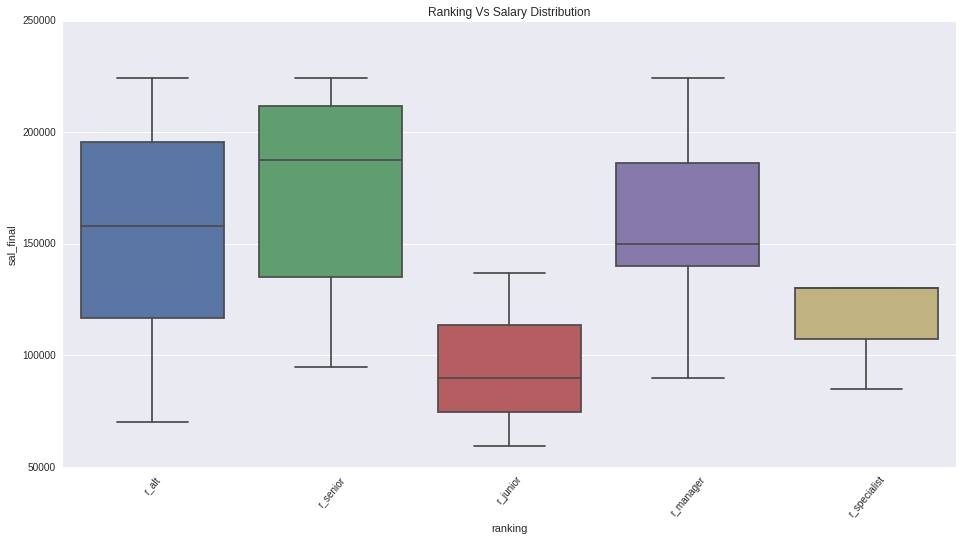

In [149]:
# Ranking V Salary Dist/Boxplots

fig = plt.figure(figsize=(16, 8))
sns.boxplot(x='ranking',y='sal_final',data=jobs_final,orient='v')
plt.title("Ranking Vs Salary Distribution")
plt.xticks(rotation=50)
plt.show()


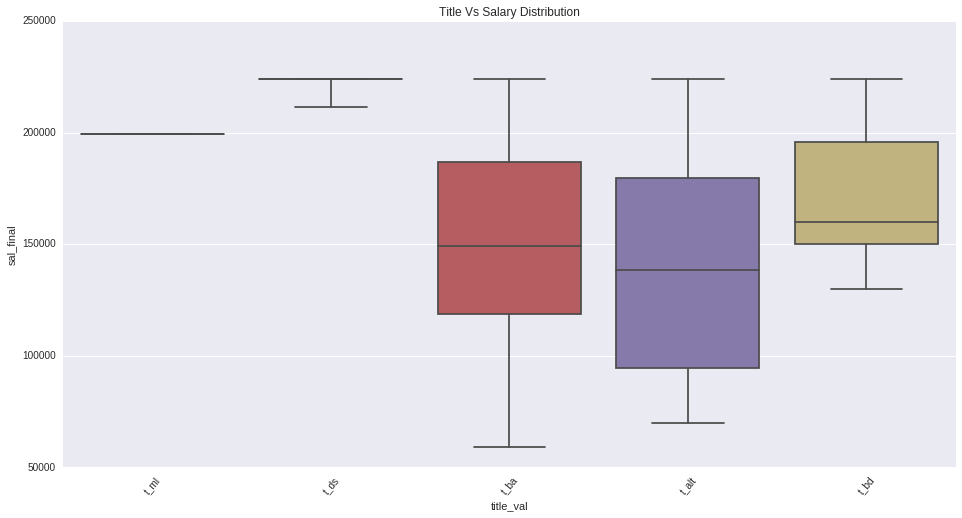

In [150]:
# Salary V title Dist/Boxplot

fig = plt.figure(figsize=(16, 8))
sns.boxplot(x='title_val',y='sal_final',data=jobs_final,orient='v')
plt.title("Title Vs Salary Distribution")
plt.xticks(rotation=50)
plt.show()

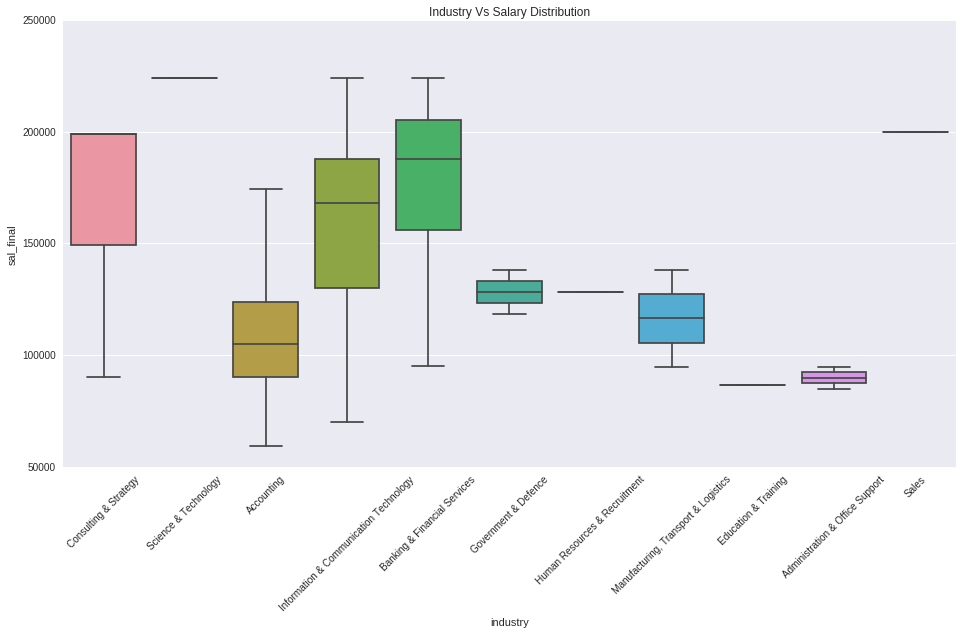

In [151]:
# Salary V Industry Dist/Boxplots

fig = plt.figure(figsize=(16, 8))
sns.boxplot(x='industry',y='sal_final',data=jobs_final,orient='v')
plt.title("Industry Vs Salary Distribution")
plt.xticks(rotation=45)
plt.show()

# Distribution insights:

It's quite clear that consulting & strategy, ICT and Banking and finance are the highest paying industries for Data Science.  ICT and B & F have wide ranges and high median salaries, this is mainly due to teh large number of jobs and range in ranking and titles.


# Part 1

With our clean jobs dataset we can begin the task of determining if / how industry, title and skillset impacts on salary.  Can we use this to predict salaries and in turn ensure the competitive edge in providing a actionable insights for our external stakeholders of Acme Recruitment.

Initially we will utilise two models to help us determine the impact of these factors in predicting.  
We will be using teh features of location, industry, jobtype, ranking to predict salary.
Secondly we will use keywords skills to investigation how best to predict salary for key skills and words in job descriptions

With a selection of predictors we will perform Linear Regression with the salary as target.

We may need to look at all avenues in order to acquire an accurate level of prediction.  In order to hone in on the salary prediction we may have to seperate the salary range into two.  asking the question for low v high paying jobs which factors influence most?

In [152]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [155]:
# Dataframe of all overall (dummy) variables - industry, title, ranking
# this will be used to ss for the purposes of the regression execises
X_overall = jobs_final[['t_ba', 't_bd', 't_ds', 't_ml',
       'r_junior', 'r_manager', 'r_senior', 'r_specialist','1_BFS', '1_ConsStrat', '1_Education', '1_Gov', '1_HR',
       '1_ICT', '1_InsurSuper', '1_MarkComms', '1_Sales', '1_SciTech',
       '1_accounting', '1_admin', '1_architecture', '1_construct',
       '1_csd', '1_customerS', '1_engineering', '1_health', '1_legal',
       '1_management', '1_manufacturing', '1_media', '1_miningEnergy',
       '1_property', '1_retail']]

In [156]:

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xs_overall = ss.fit_transform(X_overall)

In [157]:
# Set y variable:

y = jobs_final['sal_final']


In [162]:
# Lasso Linnear Regression

# Lassco CV and git with predictors and salary target
optimal_lasso = LassoCV(n_alphas=500, cv=4, verbose=1)
optimal_lasso.fit(Xs_overall, y)

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xs_overall, y, cv=4)

# Display the individual scores of each CV sampling method, and the average
print (lasso_scores)
print (np.mean(lasso_scores))

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

[ 0.48691871  0.47522058  0.15236589  0.1745048 ]
0.322252495318


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [164]:
# Validate the LassoCV and investigate the predictor coefficients

lasso.fit(Xs_overall, y)
print (lasso.score(Xs_overall, y))

lasso_coefs = pd.DataFrame({'variable':X_overall.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(5)

0.51570611738


,abs_coef,coef,variable
3,18950.737373,18950.737373,t_ml
2,15822.002985,15822.002985,t_ds
13,9754.037625,9754.037625,1_ICT
6,9737.417239,9737.417239,r_senior
8,9474.046386,9474.046386,1_BFS


Not a great score, we did try a few variables for cv and found that 4 is optimal.  The variables with the highest coefficients being machine learning, data science, the ICT industryshow that it matches with our initial plots.

We will now try a classification model.  We will split the salary into high and low. 

I've picked $120k as the divider.  This will help us to predict for ranked salaries more accurately.

We will use two models for comparison of the accuracy scores.  In this case we've selected initally -a Decision Tree Classifier and Logisitc Regression.

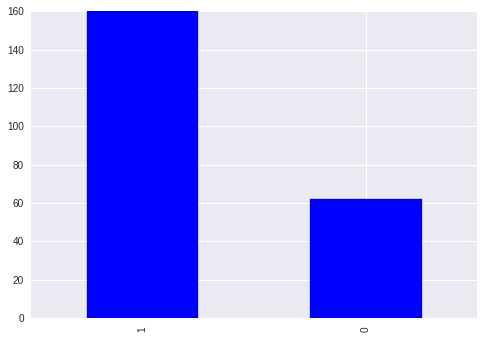

In [175]:
# Create a new X value
jobs_final['sal_split'] = 0

# Set >120000 as high $
jobs_final.loc[jobs_final.sal_final > 120000, 'sal_split'] = 1

jobs_final['sal_split'].value_counts().plot(kind='bar') # More high paid jobs than lower paid jobs!
plt.show()


In [176]:
 #Reset y as new target (class) for our classification algorithm
# ref: http://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/
# ref: https://github.com/chrisspen/dtree/blob/master/dtree.py
# Decision Tree Classification

y = jobs_final['sal_split']

In [177]:
# Perform a gridsearch to get the optimal hyperparameters for our decision tree model, based on ou X and Y variables

dtc_params = {
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

dtc = DecisionTreeClassifier()
dtc_gs = GridSearchCV(dtc, dtc_params, cv=5, verbose=1, refit=True)


In [178]:
# Fit the data to the gridsearch
dtc_gs.fit(Xs_overall, y)

Fitting 5 folds for each of 847 candidates, totalling 4235 fits


[Parallel(n_jobs=1)]: Done 4235 out of 4235 | elapsed:   26.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [184]:
# Review the accuracy 

dtc_best = dtc_gs.best_estimator_
print (dtc_gs.best_params_)
print (dtc_gs.best_score_)

{'max_features': 4, 'max_depth': 8, 'min_samples_split': 5}
0.801801801802


In [180]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeClassifier(max_features=4,min_samples_split=2,max_depth=6)

dtr.fit(X_overall, y)

dtr_scores = cross_val_score(dtr, X_overall, y, cv=5)
print (dtr_scores)
print (sum(dtr_scores)/len(dtr_scores))

[ 0.8         0.82222222  0.56818182  0.68181818  0.75      ]
0.724444444444


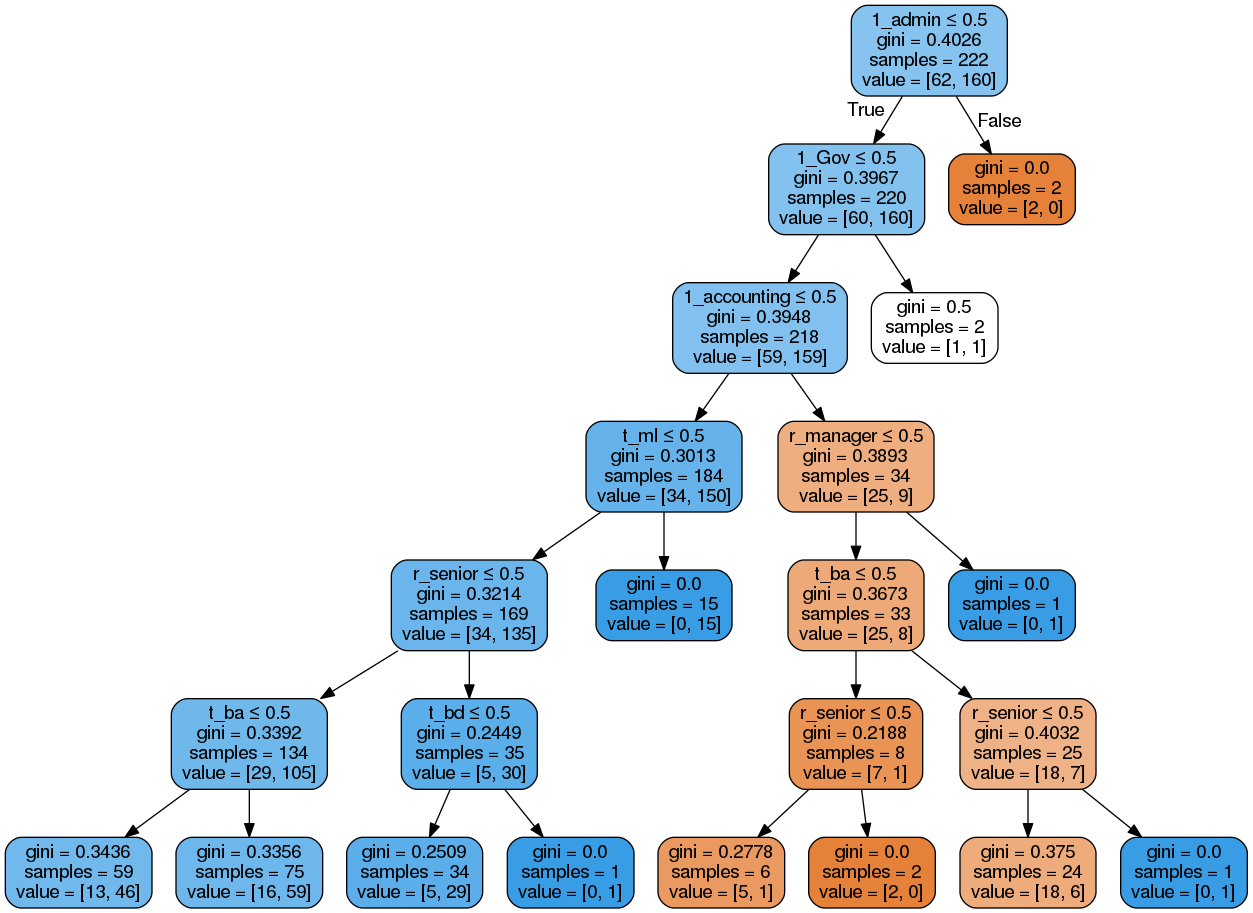

In [181]:
# Plot the final decision tree.  good scores so far, better than expected.

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV

# initialize the output file object
dot_data = StringIO() 

export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_overall.columns)  


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [182]:
# Extract the top features

top_features = pd.DataFrame({
        'feature':X_overall.columns,
        'importance':dtc_best.feature_importances_})

top_features.sort_values('importance', ascending=False, inplace=True)
top_features.head(10)

,feature,importance
18,1_accounting,0.422529
17,1_SciTech,0.127007
5,r_manager,0.101780
13,1_ICT,0.081605
7,r_specialist,0.055215
4,r_junior,0.048893
6,r_senior,0.046263
3,t_ml,0.043174
1,t_bd,0.024026
11,1_Gov,0.013938


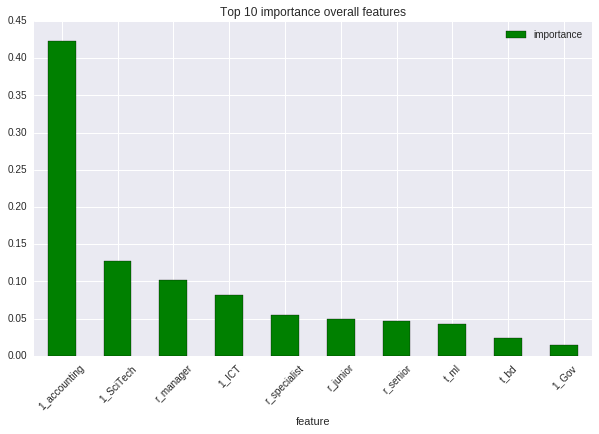

In [183]:
# Decision Tree feature importance plot

top_features.head(10).sort_values('importance',ascending=False).plot(kind='bar',
                                                                 x='feature',
                                                                 figsize=(10,6),
                                                                            rot=45,
                                                                 color='g',
                                                                 title="Top 10 importance overall features")
plt.show()

Good scores first up.  We will continue with the logistic regression as a modelling exercise to confirm best plan of action

In [185]:
# LogisticRegression classification
# Set parameters for gridsearching

gs_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.logspace(-5,0,100)
}

# pass gridsearching with logistic regression and parameters

lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=5, verbose=1)
print (lr_gridsearch)

lr_gridsearch.fit(Xs_overall, y)

# print optimal logreg scores and parameters
print (lr_gridsearch.best_score_)
print (lr_gridsearch.best_params_)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.12332e-05, ...,   8.90215e-01,   1.00000e+00]), 'solver': ['liblinear'], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
0.792792792793
{'solver': 'liblinear', 'C': 0.038535285937105271, 'penalty': 'l1'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.0s finished


In [186]:
# pass gridsearching with logistic regression and parameters

lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=5, verbose=1)
print (lr_gridsearch)

lr_gridsearch.fit(Xs_overall, y)

# print optimal logreg scores and parameters
print (lr_gridsearch.best_score_)
print (lr_gridsearch.best_params_)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.12332e-05, ...,   8.90215e-01,   1.00000e+00]), 'solver': ['liblinear'], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
0.792792792793
{'solver': 'liblinear', 'C': 0.038535285937105271, 'penalty': 'l1'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    7.7s finished


In [187]:
# export the R^2 scores and logistic Regression coefficients

best_lr = lr_gridsearch.best_estimator_

print (best_lr.score(Xs_overall, y))

coef_df_overall = pd.DataFrame({
        'coefficient':np.abs(best_lr.coef_[0]),
        'feature':X_overall.columns})

coef_df_overall.sort('coefficient',ascending=False).head(10)


0.792792792793


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  # This is added back by InteractiveShellApp.init_path()


,coefficient,feature
18,0.314165,1_accounting
0,0.000000,t_ba
17,0.000000,1_SciTech
31,0.000000,1_property
30,0.000000,1_miningEnergy
29,0.000000,1_media
28,0.000000,1_manufacturing
27,0.000000,1_management
26,0.000000,1_legal
25,0.000000,1_health


# Skills and keywords
Now we will conduct modelling predict how keywords and skills can help us better with accuracy salary

In [197]:
# create new df

X_kws = jobs_final[['python', 'java', 'ruby', 'javascript', 'data',
        'matlab', 'scala', 'excel', 'tableau', 'sas','html',
        'hadoop', 'mapreduce','spark', 'pig', 'hive', 'stats',
        'zookeeper', 'flume', 'sql', 'nosql',
        'mongodb', 'aws', 'unstructured',
        'structured', 'curiosity','communication',
        'learning', 'visualization',
        'engineering', 'maths', 'design',
        'development', 'administration', 'management','research',
        'modeling', 'predictive',
        'intelligence', 'optimization', 'mining','science',
        'cloud', 'statistics',
        'analysis', 'nlp',
        'simulation', 'simulations', 'classification', 'clustering','regression',
        'entrepreneurial', 'entrepreneur', 'team','systems',
        'wrangling',
        'deep', 'network', 'neural',
        'pandas', 'numpy', 'bi',
        'word', 'powerpoint', 'studio','ms',
        'presentation','writing',
        'bachelors','bachelor','masters','phd']]

Xs_kws = ss.fit_transform(X_kws)

In [198]:
# Perform Lasso Linnear Regression

# Lassco CV and git with predictors and salary target
optimal_lasso = LassoCV(n_alphas=500, cv=7, verbose=1)
optimal_lasso.fit(Xs_kws, y)

lasso_kws = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso_kws, Xs_kws, y, cv=7)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [199]:
# Display the individual scores of each CV sampling method, and the average
print (lasso_scores)
print (np.mean(lasso_scores))

[ 0.          0.13096269  0.09879993  0.28780983 -0.04849932  0.15359577
  0.25144331]
0.124873172853


In [200]:
# Validate the LassoCV with a lasso fit and investigate the predictor coefficients

lasso_kws.fit(Xs_kws, y)

lasso_coefs_kws = pd.DataFrame({'variable':X_keywords.columns,
                            'coef':lasso_kws.coef_,
                            'abs_coef':np.abs(lasso_kws.coef_)})

lasso_coefs_kws.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs_kws.head(10)

,abs_coef,coef,variable
7,0.137807,-0.137807,excel
35,0.064764,-0.064764,research
42,0.044292,0.044292,cloud
31,0.043332,0.043332,design
4,0.031876,0.031876,data
53,0.031187,-0.031187,team
26,0.027628,-0.027628,communication
0,0.027393,0.027393,python
23,0.018300,-0.018300,unstructured
62,0.007970,0.007970,word


In [201]:
# we will try elaticsnetCV and see how it compares as ridge regression would
# not be beneficial - just a personal hunch!!

l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=1)
optimal_enet.fit(Xs_kws, y)

print (optimal_enet.alpha_)
print (optimal_enet.l1_ratio_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.0944280490474
0.21625


........[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  1.5min finished


In [202]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, Xs_keywords, y, cv=10)

print (enet_scores)
print (np.mean(enet_scores))

[ 0.          0.00418563 -0.03876589  0.16832931  0.37813862  0.16140808
 -0.02478817  0.08071358  0.07191765  0.38461687]
0.118575567128


# Review:
Both low R^2's not a good predictor of salary.
Lets try a different direction and conduct classification route. Lets see if we can geta better result using a DTC.


Classification Modelling - Skills and Key Words
Decision Tree Classification

In [205]:
dtc_params = {
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

dtc_kws = DecisionTreeClassifier()
dtc_kws_gs = GridSearchCV(dtc_kws, dtc_params, cv=5, verbose=1, refit=True)

dtc_kws_gs.fit(Xs_keywords, y)

dtc_kws_best = dtc_gs.best_estimator_
print (dtc_kws_gs.best_params_)
print (dtc_kws_gs.best_score_)

Fitting 5 folds for each of 847 candidates, totalling 4235 fits
{'max_features': None, 'max_depth': 1, 'min_samples_split': 2}
0.792792792793


[Parallel(n_jobs=1)]: Done 4235 out of 4235 | elapsed:   28.5s finished


In [207]:
# Validate the gridsearch and R^2

dtr_kws = DecisionTreeClassifier(max_features='log2',min_samples_split=20,max_depth=None)

dtr_kws.fit(Xs_kws, y)

dtr_kws_scores = cross_val_score(dtr_kws, Xs_kws, y, cv=5)
print (dtr_kws_scores)
print (sum(dtr_kws_scores)/len(dtr_kws_scores))

[ 0.91111111  0.71111111  0.70454545  0.77272727  0.72727273]
0.765353535354


In [211]:
# Much better result, the dtc in this case is a better model for 
# this exercise.

# Part 2

# 2.1
What components of a job posting distinguish data scientists from other data jobs?


In [226]:
# Setup data scientist predictors

ds_pv = jobs_final[['python','java', 'ruby', 'javascript', 'data', 'matlab', 'scala',
       'excel', 'tableau', 'sas', 'html', 'hadoop', 'mapreduce',
       'spark', 'pig', 'hive', 'stats', 'zookeeper', 'flume', 'sql',
       'nosql', 'mongodb', 'aws', 'unstructured',
       'structured', 'curiosity', 'communication', 'learning',
       'statistics', 'visualization', 'engineering', 'maths',
       'design', 'development', 'administration',
       'research', 'modeling', 'predictive', 'intelligence',
       'optimization', 'mining', 'science', 'cloud',
       'analysis', 'nlp', 'simulation', 'simulations',
       'classification', 'clustering', 'regression', 'entrepreneurial',
       'entrepreneur', 'team', 'systems', 'wrangling',
       'deep', 'network', 'neural', 'pandas', 'numpy', 'bi',
        'word', 'powerpoint', 'studio', 'management',
       'ms', 'presentation', 'writing', 'bachelors',
       'bachelor', 'masters', 't_ba', 't_bd', 't_ds', 't_ml',
       'r_junior', 'r_manager', 'r_senior', 'r_specialist','1_BFS', '1_ConsStrat', '1_Education', '1_Gov', '1_HR',
       '1_ICT', '1_InsurSuper', '1_MarkComms', '1_Sales', '1_SciTech',
       '1_accounting', '1_admin', '1_architecture', '1_construct',
       '1_csd', '1_customerS', '1_engineering', '1_health', '1_legal',
       '1_management', '1_manufacturing', '1_media', '1_miningEnergy',
       '1_property', '1_retail']]

In [227]:
Xs_ds_pv = ss.fit_transform(ds_pv)

# Set up data scientist target

y_ds = jobs_final['t_ds']

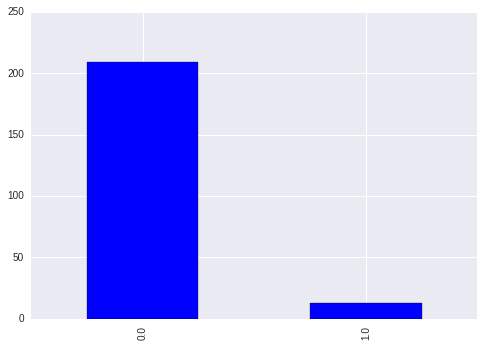

In [228]:
# Plot the counts of data science v.s other roles

y_ds.value_counts().plot(kind='bar') 
plt.show()

In [229]:
# Decision Tree gridsearch to get the optimal decision tree model

dtc_params = {
    'max_depth':[None,1,2,3,4,5,6,7,8,9,10],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

In [230]:
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()
dtc_gs = GridSearchCV(dtc, dtc_params, cv=5, verbose=1, refit=True)

dtc_gs.fit(Xs_ds_pv, y_ds)

dtc_best = dtc_gs.best_estimator_

print (dtc_gs.best_params_)
print (dtc_gs.best_score_)

Fitting 5 folds for each of 847 candidates, totalling 4235 fits
{'max_features': None, 'max_depth': None, 'min_samples_split': 3}
1.0


[Parallel(n_jobs=1)]: Done 4235 out of 4235 | elapsed:   31.1s finished


In [231]:
# Validate Decision tree model and R^2

dtr_ds = DecisionTreeClassifier(max_features=3,min_samples_split=2,max_depth=None)

dtr_ds.fit(Xs_ds_pv, y_ds)

dtr_ds_scores = cross_val_score(dtr_ds, ds_pv, y_ds, cv=5)

In [225]:
# Export scores of validated model

print (dtr_ds_scores)
print ((sum(dtr_ds_scores)/len(dtr_ds_scores)))


[ 1.          0.97777778  1.          1.          1.        ]
0.995555555556


In [ ]:
# WOW > POW.... what a result.  we have our model! Only ds jobs but 
# clearly this should be very accurate as its teh min search.

# 2.2
What features are important for distinguishing junior vs. senior positions?

In [232]:
# Create a classification dictionary for the 'industry' variable:

industry_cl = {'Information & Communication Technology':1,'Accounting':2, 'Banking & Financial Services':3,
                       'Consulting & Strategy':4 ,'Science & Technology':5,'Marketing & Communications':6,
                       'Government & Defence':7 ,'Insurance & Superannuation':8,'Education & Training':9,'Sales':10}

# Map the cl dictionary to the industry variable and create the multinomial classification target
# I will only include the top-10 industries in this classification analysis


In [234]:
jobs_final['industry_t'] = jobs_final['industry'].map(industry_cl)

# for all other variables I will set to a class of 0

jobs_final['industry_t'] = jobs_final['industry_t'].fillna(0)

# Check the industry mapping

print (jobs_final[['industry','industry_t']].head(10))


                 industry  industry_t
8   Consulting & Strategy           4
14   Science & Technology           5
28  Consulting & Strategy           4
34   Science & Technology           5
46  Consulting & Strategy           4
56   Science & Technology           5
68  Consulting & Strategy           4
74   Science & Technology           5
86  Consulting & Strategy           4
96   Science & Technology           5


In [239]:
ind_cl = jobs_final[['python','java', 'ruby', 'javascript', 'data', 'matlab', 'scala',
       'excel', 'tableau', 'sas', 'html', 'hadoop', 'mapreduce',
       'spark', 'pig', 'hive', 'stats', 'zookeeper', 'flume', 'sql',
       'nosql', 'mongodb', 'aws', 'unstructured',
       'structured', 'curiosity', 'communication', 'learning',
       'statistics', 'visualization', 'engineering', 'maths',
       'design', 'development', 'administration',
       'research', 'modeling', 'predictive', 'intelligence',
       'optimization', 'mining', 'science', 'cloud',
       'analysis', 'nlp', 'simulation', 'simulations',
       'classification', 'clustering', 'regression', 'entrepreneurial',
       'entrepreneur', 'team', 'systems', 'wrangling',
       'deep', 'network', 'neural', 'pandas', 'numpy', 'bi',
        'word', 'powerpoint', 'studio', 'management',
       'ms', 'presentation', '1_BFS', '1_ConsStrat', '1_Education', '1_Gov', '1_HR',
       '1_ICT', '1_InsurSuper', '1_MarkComms', '1_Sales', '1_SciTech',
       '1_accounting', '1_admin', '1_architecture', '1_construct',
       '1_csd', '1_customerS', '1_engineering', '1_health', '1_legal',
       '1_management', '1_manufacturing', '1_media', '1_miningEnergy',
       '1_property', '1_retail']]

In [240]:
# Set industry class as target

y_ind = jobs_final['industry_t']

#Logistic Regression - Industry

# Perform gridsearch on logistic regression with industry variables/target

lr_gridsearch.fit(ind_cl, y_ind)

print (lr_gridsearch.best_score_)
print (lr_gridsearch.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.972972972973
{'solver': 'liblinear', 'C': 0.31257158496882353, 'penalty': 'l1'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   13.2s finished


In [242]:
# Export the coefficients from the optimised logreg model

best_lr_skills = lr_gridsearch.best_estimator_


In [244]:
# Create a dataframe of the predictors and the logreg coefficients:

df_cl = pd.DataFrame(np.abs(best_lr_skills.coef_))
df_cl.columns = ind_cl.columns
industry_class_name = ['ICT','Accounting', 'Banking_FS',
                       'Consulting_Strategy' ,'Science_Technology','Marketing',
                       'Government' ,'Insurance','Education']
df_cl_transpose = pd.DataFrame.transpose(df_cl)
df_cl_transpose.columns = industry_class_name

df_cl_transpose.head()

# Print and plot coefficients for ICT industry


,ICT,Accounting,Banking_FS,Consulting_Strategy,Science_Technology,Marketing,Government,Insurance,Education
python,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
java,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
ruby,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
javascript,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
data,0.117924,0.136999,0.229689,0.086722,0,0.035557,0.036595,0.200972,0.202835
